<a href="https://colab.research.google.com/github/rodrigofer89/Machine-Learning/blob/main/Arvore_de_decis%C3%A3o_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

# Metodo para separação de TREINO e TESTE
from sklearn.model_selection import train_test_split

# Algoritimos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Visualização da árvore
from sklearn.tree import plot_tree

# Metricas de Avaliação
from sklearn.metrics import accuracy_score

%matplotlib inline

Leitura da base de TREINO

In [110]:
df = pd.read_csv('titanic.csv')

In [111]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Limpeza da base de TREINO


*   Usar apenas as features de interesse: Survived, Age, Pclass,Sex
*   Remover linhas sem informação (NA)
*   Transformar strings em dados numéricos





In [115]:
df.drop_duplicates(inplace=True)

In [116]:
df.dropna(inplace=True)

In [117]:
df.shape

(183, 12)

In [118]:
df['Sex'].unique()

array(['female', 'male'], dtype=object)

In [119]:
# Expressão lambda para definir como a coluna SEX deve ter os valores alterados
sexo = lambda x: 0 if x == 'male' else 1

In [120]:
df['Sex'] = df['Sex'].apply(sexo)

In [121]:
df = df[ ['Survived', 'Age', 'Pclass', 'Sex'] ]

Machine learning (Criação dos modelos)


*   Dividir os dados entre treino e teste
*   escolher qual modelo (algoritmo) utilizar
*   criar o modelo em si (treino)
*   avaliar o "poder preditivo" do método





In [122]:
# X são o dados
X = df.drop(columns=['Survived'])
# y é o nosso label(Target)
y = df['Survived']

Fazendo a separação entre TREINO e TESTE

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [124]:
# Arvore
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_label = tree.predict(X_test)

In [125]:
# Quais são as classes?
tree.classes_

array([0, 1])

In [126]:
# Quais são os labels preditos?
y_pred_label

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [127]:
# Qual a taxa de acerto?
accuracy_score(y_test, y_pred_label)

0.717391304347826

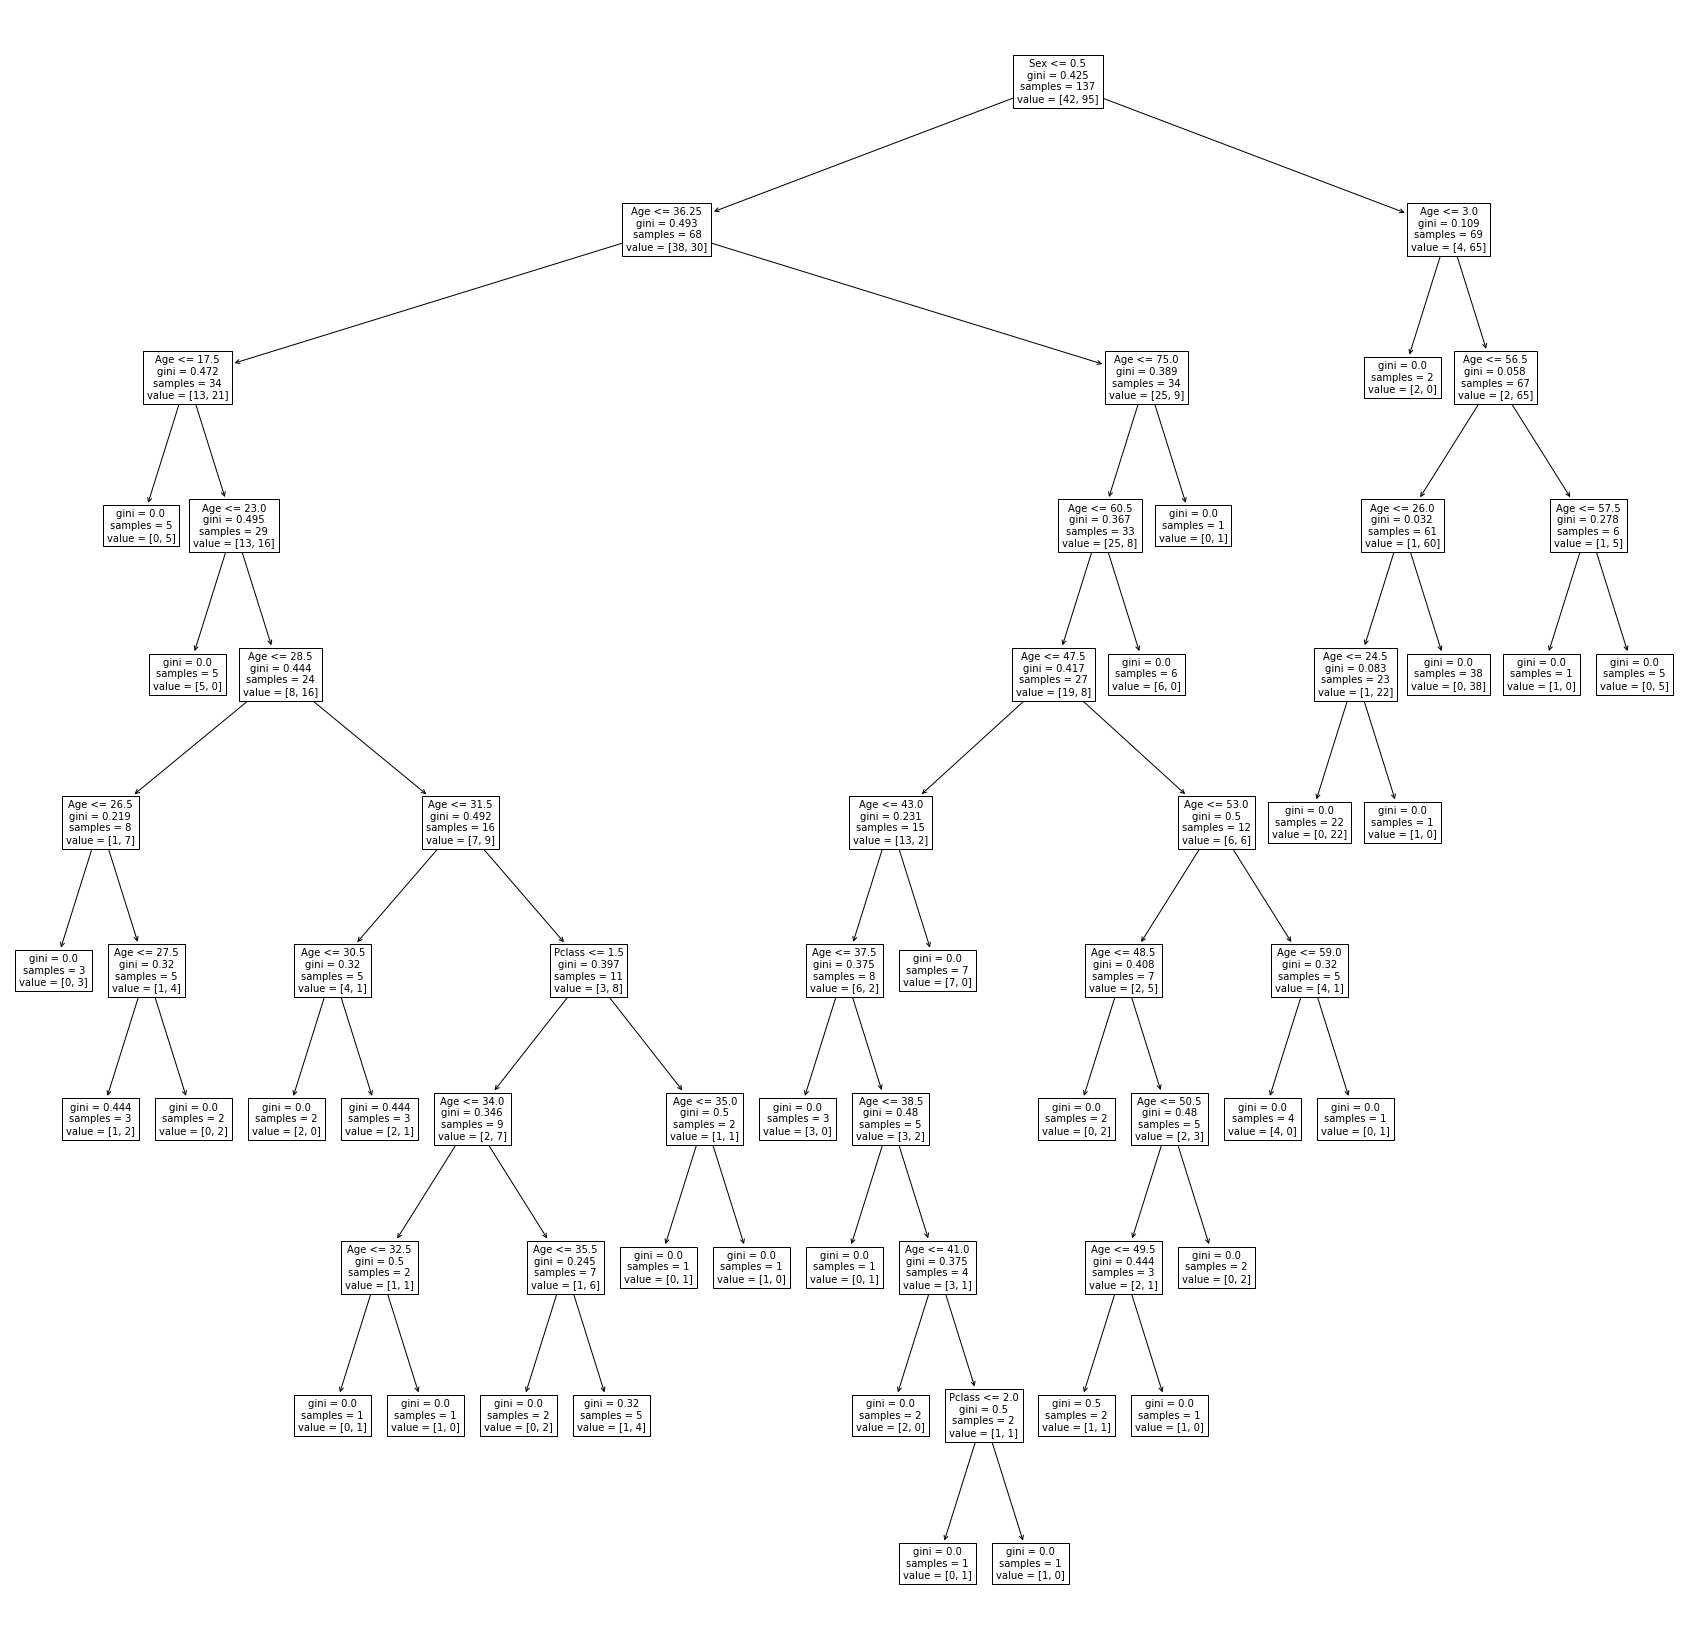

In [128]:
# Podemos visualizar a árvore criada?
plt.figure(figsize=(30,30))
plot_tree(tree, fontsize=10, feature_names=X_train.columns)
plt.show()

Agora vamos testar o comportamento dos mesmos dados num modelo de **Florestas Aleatórias:**

In [129]:
floresta = RandomForestClassifier(n_estimators=5)
floresta.fit(X_train, y_train)
y_pred_label_floresta = floresta.predict(X_test)

In [130]:
accuracy_score(y_test, y_pred_label_floresta)

0.717391304347826

**Trabalhando com a AUC**

In [131]:
# Arvore
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_prob = tree.predict_proba(X_test)

In [132]:
from sklearn.metrics import roc_auc_score

In [133]:
roc_auc_score(y_test, y_pred_prob[:,1])

0.7212301587301587

**Iterando por múltiplos modelos**

Vamos construir outros modelos e testá-los de uma vez, armazenando os resultados para encontrarmos o mais promissor.

In [134]:
modelos = [
    ( DecisionTreeClassifier() , '1 árvore'),
    ( RandomForestClassifier(n_estimators=5), '5 árvores' ),
    ( RandomForestClassifier(n_estimators=10), '10 árvores' ),
    ( RandomForestClassifier(n_estimators=100), '100 árvores' )
]

In [135]:
for classificador, nome in modelos:

  classificador.fit(X_train, y_train)
  probs = classificador.predict_proba(X_test)

  auc = roc_auc_score(y_test, probs[:,1])
  print(f'Modelo: {nome} : AUC: {auc}')

Modelo: 1 árvore : AUC: 0.7212301587301587
Modelo: 5 árvores : AUC: 0.7708333333333334
Modelo: 10 árvores : AUC: 0.7886904761904763
Modelo: 100 árvores : AUC: 0.8214285714285715
